In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [4]:
transactions = []
f = open("./CSVs-Data/transactions.csv", "r")
for line in f:
    line = line.split(',')
    l1 = [float(line[0]), float(line[1]), int(line[2])]
    transactions.append(l1)

transactions

[[2.1, 6.4, 1],
 [3.8, 2.2, 1],
 [15.7, 4.4, 1],
 [26.7, 4.6, 1],
 [10.7, 4.9, 1],
 [11.3, 5.1, 1],
 [120.7, 3.1, 1],
 [140.3, 4.1, 1],
 [30.0, 5.1, 1],
 [45.0, 4.2, 1],
 [80.0, 3.7, 1],
 [20.0, 5.2, 1],
 [100.0, 4.0, 1],
 [80.0, 4.0, 1],
 [70.0, 1.5, 1],
 [40.0, 1.0, 0],
 [100.0, 2.0, 0],
 [40.0, 2.7, 0],
 [63.0, 1.5, 0],
 [0.7, 1.2, 0],
 [0.5, 0.8, 0],
 [0.8, 1.5, 0],
 [0.2, 1.1, 0],
 [0.1, 0.8, 0],
 [20.0, 2.2, 0],
 [60.0, 2.1, 0],
 [105.0, 0.4, 0],
 [10.0, 1.2, 0],
 [15.0, 1.7, 0],
 [12.0, 1.0, 0]]

In [5]:
def euclidean(instance1, instance2):
    distance = 0
    for x in range(0,2):
        distance += pow((instance1[x] - instance2[x]), 2)
    return np.sqrt(distance)

In [12]:
# Write a get_distances/2 function that calculates the distance between a query and each instance in out dataset. Remember to keep track of the corresponding instance ID too, not only of the distance. Sort the list so that the closest item is at the top.
def get_distance(transactions , query):
    distances = []
    for i in range(len(transactions)):
        dist = euclidean(query, transactions[i])
        distances.append((transactions[i], dist))
    
    distances.sort(key=lambda x: x[1])

    return distances


def knn_estimate(data, query, k =5):
    distances = get_distance(data, query)

    # Get the first k elements from the list
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])

    # Get majority level of k neighbors
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)

    return prediction


In [50]:
print(knn_estimate(transactions, [30, 2], k=5))
print(knn_estimate(transactions, [10, 3], k=5))
print(knn_estimate(transactions, [200, 6], 30))

[1, 1, 0, 0, 0]
0
0
[0, 1, 1, 0, 0]
0
0
[1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0]
0
0


In [51]:
# Dataframe from fruit_data.txt
data = pd.read_csv('./CSVs-Data/fruit_data.txt', sep='\t')

# split data into features and target (featurs = mass, height)
predictive_features = data[['mass', 'height']]

print(predictive_features.head())

targets = data['fruit_name']
print("targets")
print(targets.head())


# Use train_test_split to split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictive_features, targets, random_state=3000)


   mass  height
0   192     7.3
1   180     6.8
2   176     7.2
3    86     4.7
4    84     4.6
targets
0       apple
1       apple
2       apple
3    mandarin
4    mandarin
Name: fruit_name, dtype: object


In [52]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)


0.4666666666666667

In [54]:
query = knn.predict([[21, 5.4]])
print(query)

['mandarin']


/Users/xsmoked/miniforge3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


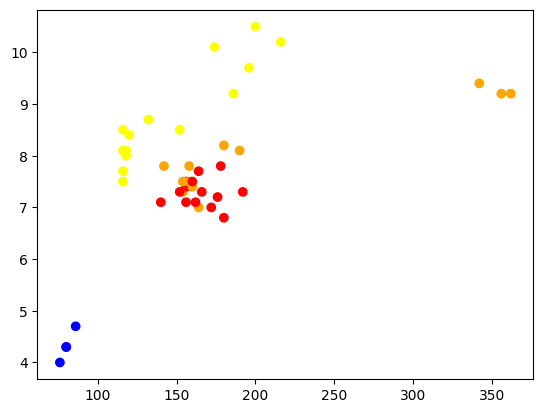

In [55]:
colors_map = {'apple': 'red', 'mandarin': 'blue', 'orange':'orange', 'lemon':'yellow'}
colors = [colors_map[c] for c in y_train]
plt.scatter(X_train.mass, X_train.height, c = colors)

In [40]:
# Read Housing.csv
housing = pd.read_csv('./CSVs-Data/Housing.csv')
housing.head()

targets = housing['price']

predictive_features = housing.drop('price', axis=1)

headers = predictive_features.columns

# Change all yes and no to 1 and 0
predictive_features = predictive_features.replace({'yes': 1, 'no': 0})
predictive_features = predictive_features.replace({'furnished': 0, 'semi-furnished': 1, 'unfurnished': 2})


X_train, X_test, y_train, y_test = train_test_split(predictive_features, targets, random_state=3000)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

query = knn.predict([[ 8580,4,3,4,1,0,0,0,1,2,1,1 ]])

print(query)



[5250000]


/Users/xsmoked/miniforge3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
